In [28]:
import pickle

import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
scores_cefta = np.load("results/cv/cv_scores__Ceftazidim.npy")
scores_cipro = np.load("results/cv/cv_scores__Ciprofloxacin.npy")
scores_colis = np.load("results/cv/cv_scores__Colistin.npy")
scores_merop = np.load("results/cv/cv_scores__Meropenem.npy")
scores_tobra = np.load("results/cv/cv_scores__Tobramycin.npy")

In [3]:
print((scores_cefta.mean(), scores_cefta.std()))

(0.835204991087344, 0.09643411388737522)


array([0.68716578, 0.92557932, 0.80481283, 0.95543672, 0.8030303 ])

In [4]:
print((scores_cipro.mean(), scores_cipro.std()))

(0.8832552729528537, 0.026991370384550267)


array([0.875     , 0.90625   , 0.8375    , 0.88341346, 0.9141129 ])

In [5]:
print((scores_colis.mean(), scores_colis.std()))

(0.7977444124502948, 0.11043539331196695)


array([0.59224599, 0.91087344, 0.81327986, 0.79901961, 0.87330317])

In [6]:
print((scores_merop.mean(), scores_merop.std()))

(0.8979243970315398, 0.041388333825377835)


array([0.88311688, 0.94434137, 0.82513915, 0.91372913, 0.92329545])

In [7]:
print((scores_tobra.mean(), scores_tobra.std()))

(0.9509365634365634, 0.05007233906541514)


array([0.87706044, 0.98181818, 0.9048951 , 0.99090909, 1.        ])

In [3]:
pred_cefta = np.load("results/cv/cv_pred__Ceftazidim.npy")
pred_cipro = np.load("results/cv/cv_pred__Ciprofloxacin.npy")
pred_colis = np.load("results/cv/cv_pred__Colistin.npy")
pred_merop = np.load("results/cv/cv_pred__Meropenem.npy")
pred_tobra = np.load("results/cv/cv_pred__Tobramycin.npy")

In [6]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]

In [9]:
true_cefta = pheno.iloc[:, 2].dropna().to_numpy()
true_cipro = pheno.iloc[:, 3].dropna().to_numpy()
true_colis = pheno.iloc[:, 5].dropna().to_numpy()
true_merop = pheno.iloc[:, 4].dropna().to_numpy()
true_tobra = pheno.iloc[:, 1].dropna().to_numpy()

In [11]:
balanced_accuracy_score(true_cefta, pred_cefta)

0.8353415814954277

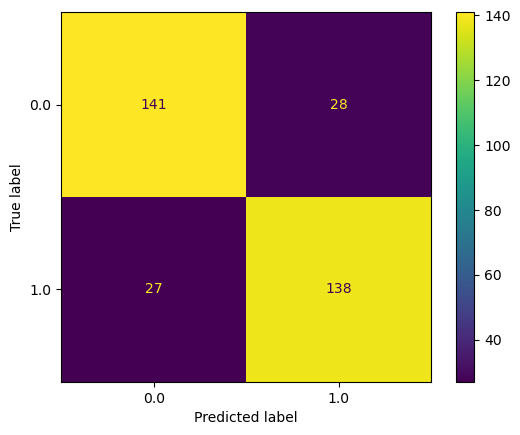

In [29]:
ConfusionMatrixDisplay.from_predictions(true_cefta, pred_cefta)

In [15]:
balanced_accuracy_score(true_cipro, (pred_cipro >= .5).astype(int))

0.8830789165955564

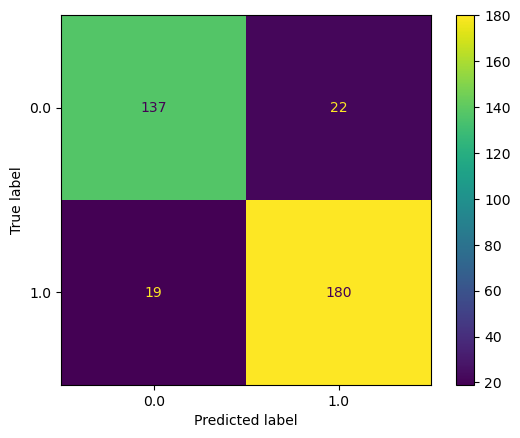

In [31]:
ConfusionMatrixDisplay.from_predictions(true_cipro, (pred_cipro >= .5).astype(int))

In [16]:
balanced_accuracy_score(true_colis, pred_colis)

0.7976399070266404

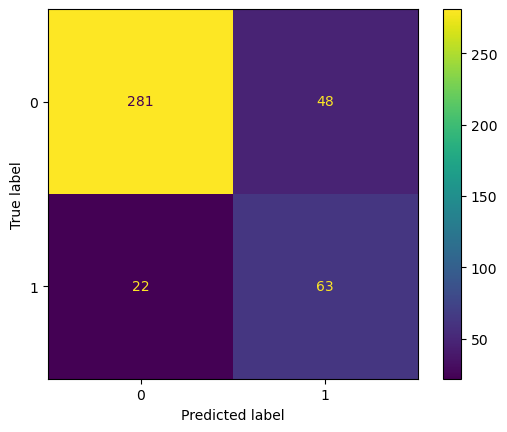

In [32]:
ConfusionMatrixDisplay.from_predictions(true_colis, pred_colis)

In [18]:
balanced_accuracy_score(true_merop, (pred_merop >= .5).astype(int))

0.897876304023845

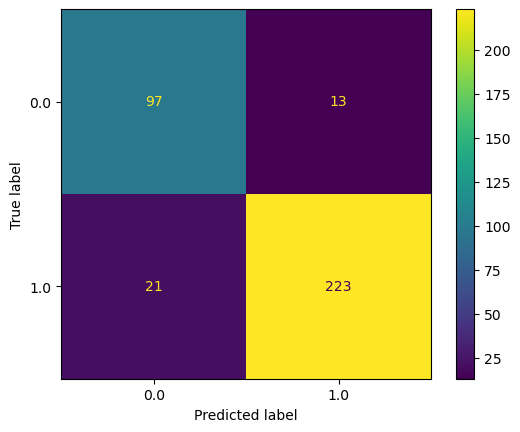

In [34]:
ConfusionMatrixDisplay.from_predictions(true_merop, (pred_merop >= .5).astype(int))

In [19]:
balanced_accuracy_score(true_tobra, pred_tobra)

0.950891861761427

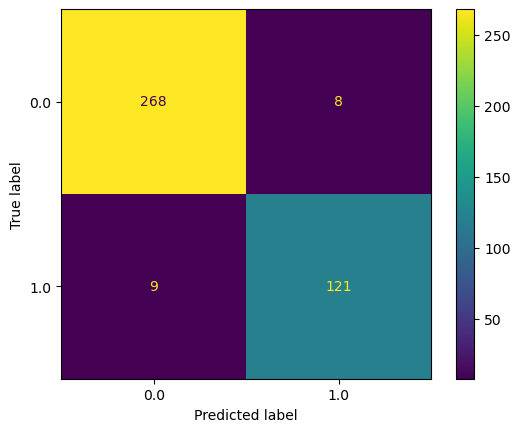

In [33]:
ConfusionMatrixDisplay.from_predictions(true_tobra, pred_tobra)

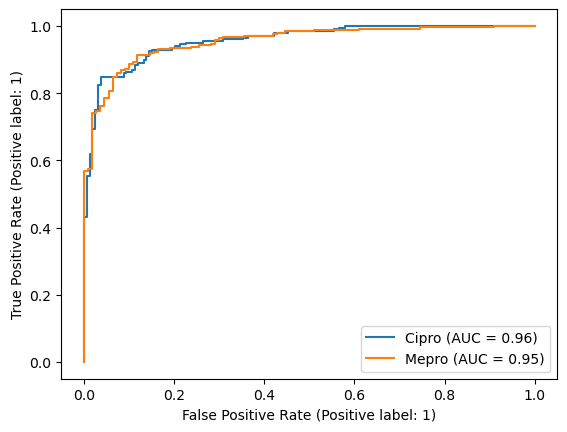

In [24]:
ax = RocCurveDisplay.from_predictions(true_cipro, pred_cipro, name="Cipro").ax_
RocCurveDisplay.from_predictions(true_merop, pred_merop, ax=ax, name="Mepro")